Los r donde I' se anula son:
0
0.30491741862058513
0.5582825508797065
0.8095787775549165
1.0602656247470175
1.3106910044487154
1.5609803336808727


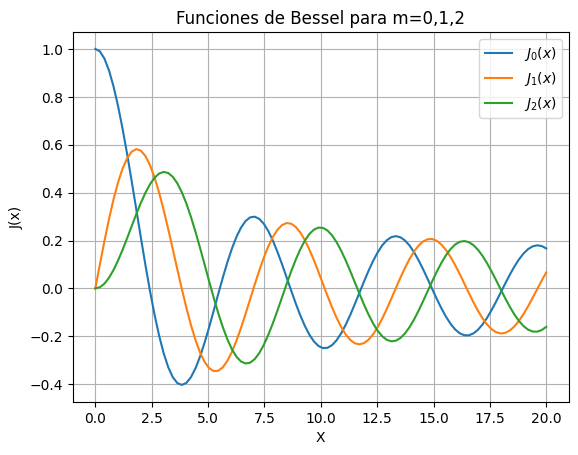

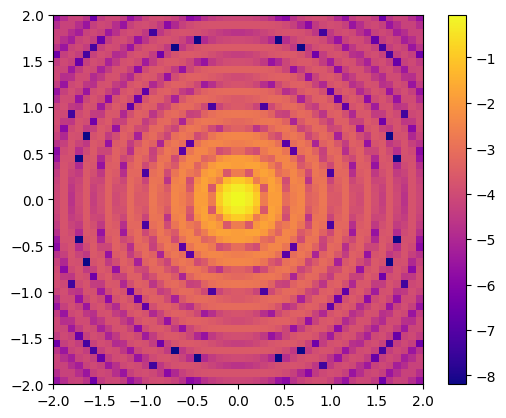

In [188]:
import numpy as np
import matplotlib.pyplot as plt


def Bessel(m,n,x):
    delta=(np.pi)/n
    Jpar=0
    Jimpar=0
    Jextremos=0
    v=0
    for i in range (n+1):
        v=i*delta
        if i==0 or i==n:
            Jextremos+=np.cos(m*v-x*np.sin(v))
        elif i%2==0:
            Jpar+=2*np.cos(m*v-x*np.sin(v))
        else:
            Jimpar+=4*np.cos(m*v-x*np.sin(v))
      
    return (delta/(3*np.pi))*(Jextremos+Jpar+Jimpar)


x=np.linspace(0,20,100)


for j in range (3):
    a=np.zeros(len(x))
    for i in range (len(x)):
        a[i]+=Bessel(j,1000,x[i])

    plt.plot(x,a, label=f"$J_{j}(x)$")
    plt.title("Funciones de Bessel para m=0,1,2")
    plt.xlabel('X')
    plt.ylabel('J(x)')
    plt.legend()
    plt.grid()

#Aplicación de la Funcion de Bessel a la Difracción de Airy
#Generacion de la imagen del patron de difracción

long=0.5 #Micrometros
k=2*np.pi/long
N=50

x_g=np.linspace(-2,2,N)
y_g=np.linspace(-2,2,N)
X, Y=np.meshgrid(x_g,y_g)
Rred=np.sqrt(X**2+Y**2)

I=np.zeros_like(Rred)

for i in range((N)):
    for j in range((N)):
        if k*Rred[i,j]==0:
            I[i,j]=1.0
        else:
            I[i,j]+=((2*Bessel(1,1000,k*Rred[i,j]))/(k*Rred[i,j]))**2



plt.figure()
plt.imshow(np.log10(I + 1e-10), cmap='plasma', extent=[-2, 2, -2, 2]) #Uso de escala logaritmica para notar con mayor claridad los anillos
plt.colorbar()


# Valores de r donde la derivada de I se anula


def Derivada_Bessel(m,x):
    dJ=(1/2)*(Bessel(m-1,1000,x)-Bessel(m+1,1000,x))
    return dJ

print("Los r donde I' se anula son:")
for o in range (7):
    r_0= o*0.25
    for z in range (100):
        if r_0==0:
            r_0=0
        else:
            dI= 2*(2*Bessel(1,1000,k*r_0)/(k*r_0))*((Bessel(0,1000,k*r_0)-Bessel(2,1000,k*r_0))/(r_0)-(2*Bessel(1,1000,k*r_0)/(k*k*r_0*r_0)))
            I=((2*Bessel(1,1000,k*r_0))/(k*r_0))**2
            delta=-I/dI
            r_0+=delta
            if abs(delta)<0.0000001:
                break
    print(r_0)



